# **Task**
Analyze the data from the garments worker productivity dataset, preprocess it, build and compare Linear Regression, Random Forest, and XGBoost models to predict productivity, and save the best performing model.

##**1. Load Data**

**Subtask**: Load the dataset into a pandas DataFrame.

**Reasoning**: Import the necessary library (pandas), load the dataset using its file path, and then display the first few rows and a summary of the data to ensure it has loaded correctly.

In [2]:
import pandas as pd
import os

# Define the path to the dataset relative to the notebook
# This goes up to the 'Employee_App' directory, then down into 'Dataset'
dataset_path = os.path.join('..', 'Dataset', 'garments_worker_productivity.csv')

# Load the dataset
df = pd.read_csv(dataset_path)

print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset Information:")
display(df.info())

First 5 rows of the dataset:


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01-01-2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,01-01-2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,01-01-2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,01-01-2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,01-01-2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-nu

None

##2. **Visualize and Analyze Data**

**Subtask**: Visualize and analyze the dataset's properties.

**Reasoning**: To understand the data's characteristics, we'll generate histograms to see the distribution of numerical features, box plots to identify potential outliers, and a correlation heatmap to understand the relationships between variables.

--- Histograms of Numerical Features ---


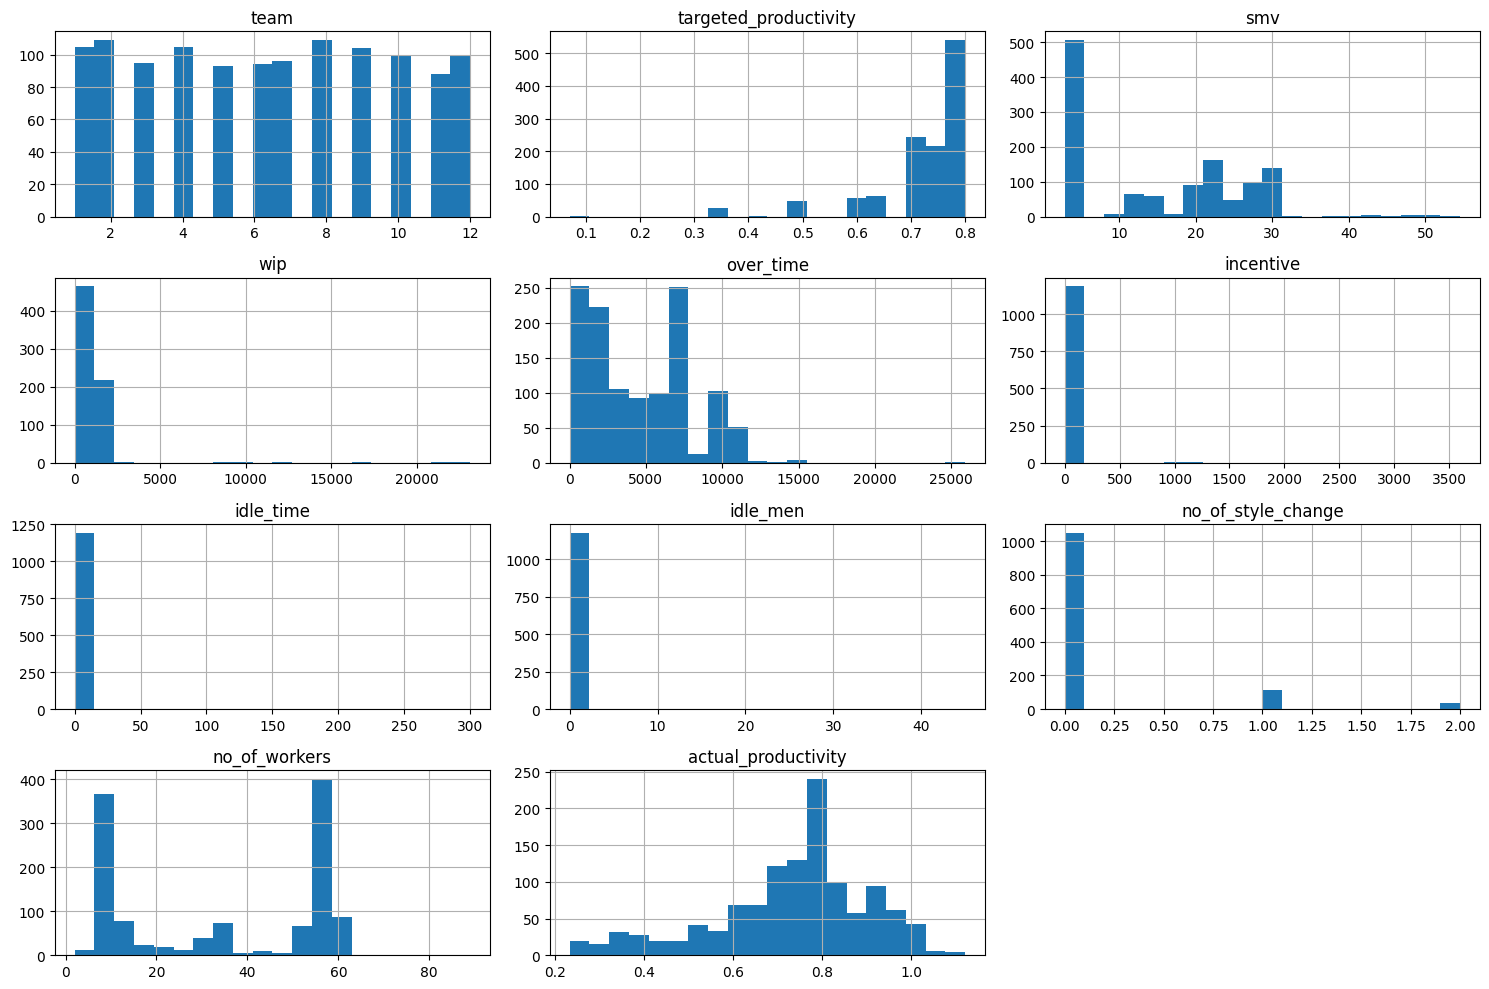


--- Box Plots of Numerical Features ---


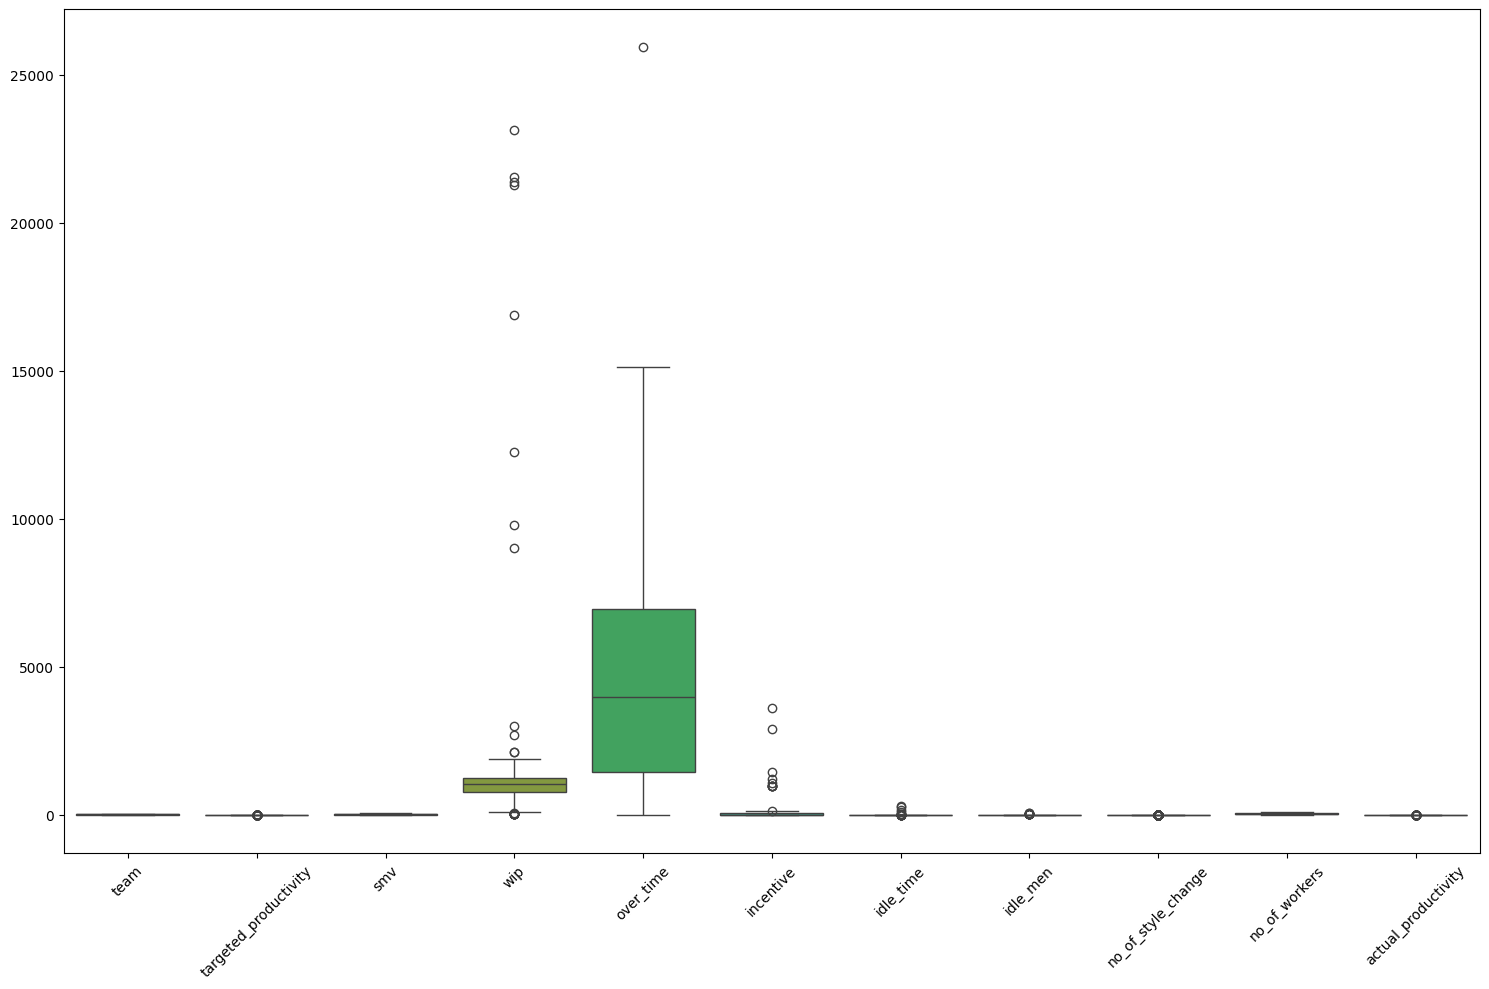


--- Correlation Matrix of Numerical Features ---


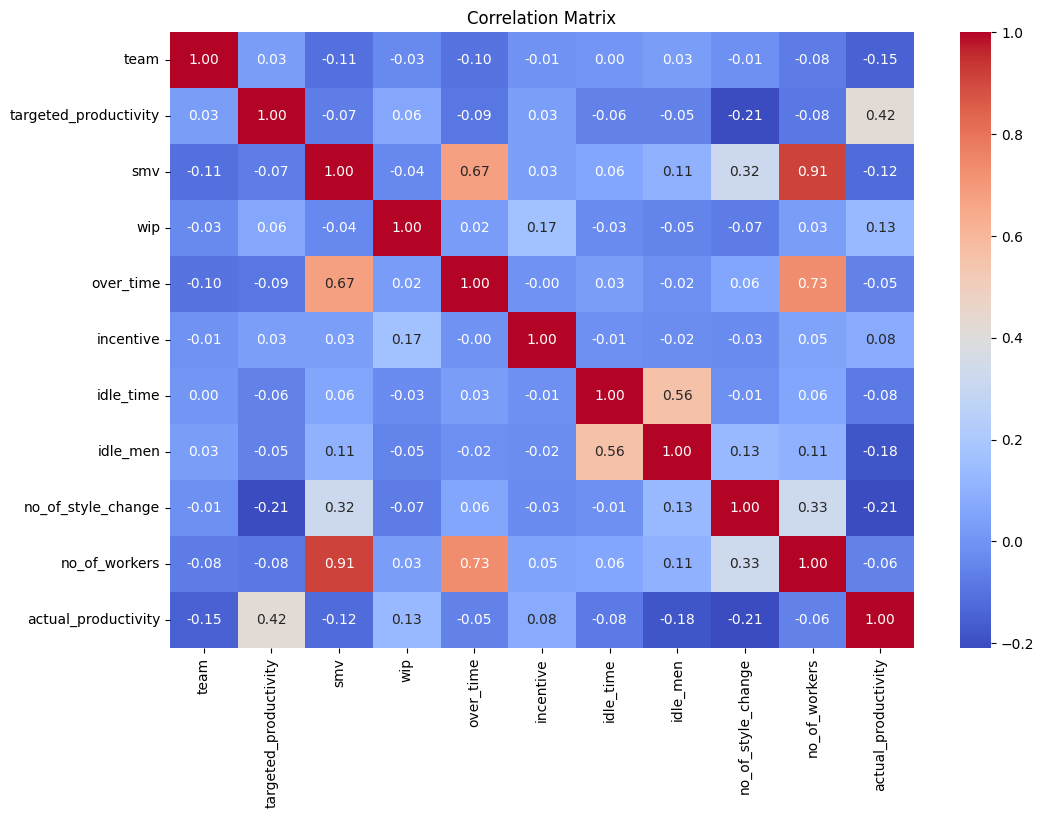

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numerical columns for visualization
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Generate histograms for each numerical feature
print("--- Histograms of Numerical Features ---")
df[numerical_cols].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

# Generate box plots to check for outliers
print("\n--- Box Plots of Numerical Features ---")
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Generate a correlation matrix and heatmap
print("\n--- Correlation Matrix of Numerical Features ---")
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

##**3. Preprocess Data**

**Subtask**: Handle missing values, encode categorical features, and split the data for training and testing.

**Reasoning**: This step is crucial to prepare the data for the machine learning models. We'll fill missing wip values with the mean, convert categorical text data into a numerical format using one-hot encoding, and then split the data into features (X) and a target (y). Finally, we'll divide it into training and testing sets.

In [4]:
from sklearn.model_selection import train_test_split

# 1. Handle missing values in the 'wip' column by filling with the mean
df['wip'].fillna(df['wip'].mean(), inplace=True)

# 2. Clean the 'department' column by removing leading/trailing spaces
df['department'] = df['department'].str.strip()

# 3. Identify categorical columns (excluding 'date')
categorical_cols = df.select_dtypes(include=['object']).columns.drop('date')

# 4. Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 5. Define the features (X) and the target variable (y)
# We drop the original 'date' column as it's not used, and the target variable 'actual_productivity'
X = df_encoded.drop(['actual_productivity', 'date'], axis=1)
y = df_encoded['actual_productivity']

# 6. Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")

Training set has 957 samples.
Testing set has 240 samples.


C:\Users\tanuj\AppData\Local\Temp\ipykernel_14052\73788655.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wip'].fillna(df['wip'].mean(), inplace=True)


##**4. Build and Train Models**

**Subtask**: Train Linear Regression, Random Forest, and XGBoost models.

**Reasoning**: We will create instances of our three chosen models and train each one on the prepared training data (X_train, y_train).

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Create instances of the models
linear_reg_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# Train each model
print("Training Linear Regression model...")
linear_reg_model.fit(X_train, y_train)

print("Training Random Forest model...")
rf_model.fit(X_train, y_train)

print("Training XGBoost model...")
xgb_model.fit(X_train, y_train)

print("\nAll models have been trained successfully.")

Training Linear Regression model...
Training Random Forest model...
Training XGBoost model...

All models have been trained successfully.


##**5. Evaluate Models**

**Subtask**: Evaluate the performance of each trained model on the unseen testing data.

**Reasoning**: To determine the best model, we'll use the trained models to make predictions on the test set. We will then compare these predictions to the actual values using three standard metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and the R-squared (R2) score.

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Store the models in a dictionary for easy iteration
models = {
    "Linear Regression": linear_reg_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

# Create a list to store the performance results
performance_data = []

print("--- Evaluating Model Performance ---")
for name, model in models.items():
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    performance_data.append({'Model': name, 'MAE': mae, 'MSE': mse, 'R2': r2})

    print(f"\n{name}:")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  R2 Score: {r2:.4f}")

--- Evaluating Model Performance ---

Linear Regression:
  MAE: 0.1088
  MSE: 0.0219
  R2 Score: 0.1736

Random Forest:
  MAE: 0.0724
  MSE: 0.0144
  R2 Score: 0.4592

XGBoost:
  MAE: 0.0785
  MSE: 0.0175
  R2 Score: 0.3405


##**6. Compare Models and Save the Best One**

**Subtask**: Display the performance metrics in a table and save the winning model.

**Reasoning**: We will create a pandas DataFrame from our results for a clear, side-by-side comparison. The model with the highest R2 score will be identified as the best performer and saved as gwp.pkl into the Flask directory for the web app to use.

In [7]:
import pickle

# Create a DataFrame for easy comparison
performance_df = pd.DataFrame(performance_data).set_index('Model')

print("\n--- Model Performance Comparison ---")
display(performance_df)

# Find the best model based on the highest R2 score
best_model_name = performance_df['R2'].idxmax()
best_model = models[best_model_name]

print(f"\nThe best performing model is: {best_model_name}")

# Define the save path to be inside the Flask folder
save_path = os.path.join('..', 'Flask', 'gwp.pkl')

# Save the best performing model using pickle
with open(save_path, 'wb') as file:
    pickle.dump(best_model, file)

print(f"\nModel '{best_model_name}' has been successfully saved to: {save_path}")


--- Model Performance Comparison ---


,MAE,MSE,R2
Model,,,
Linear Regression,0.108771,0.021944,0.173576
Random Forest,0.072418,0.014359,0.459227
XGBoost,0.078527,0.017512,0.340469



The best performing model is: Random Forest

Model 'Random Forest' has been successfully saved to: ..\Flask\gwp.pkl
